# 3. Analysis
## 3.4. Q4: Comparison between the frequency of news stories aired about V. Putin and that of other individuals

In [22]:
import pandas as pd
import numpy as np
import copy
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
import translators as ts
import translators.server as tss

In [23]:
%run "3.0. Analysis_Functions.ipynb"

In [24]:
%run "0.1. Intro_Visualization style.ipynb"

## Data loading

In [25]:
# Tokenized data set
file = 'data/df_tokenized.csv'

In [26]:
df_tokenized = pd.read_csv(file)
df_tokenized.drop(columns=['Unnamed: 0'], inplace=True)
df_tokenized['dat'] = pd.to_datetime(df_tokenized['dat'])

In [27]:
df_tokenized.head(3)

,id_in_source_file,date,tags_top,title,url,body,tags_bottom,video_duration_seconds,file_key,datetime,dat,year,year_month,hour,weekday,whole newscast,body_token_final,title_token_final
0,15,2023-01-27 21:45:00,Общество,Выпуск программы «Время» в 21:00 от 27.01.2023,https://www.1tv.ru/news/2023-01-27/446104-vypu...,Смотрите в этом выпуске: 79 лет назад была пол...,Общество,2422.0,0-15,2023-01-27 21:45:00,2023-01-27,2023,2023-01,21,4,True,"['смотреть', 'выпуск', '79', 'год', 'полностью...","['выпуск', 'программа', 'время', '21:00', '27...."
1,16,2023-01-27 21:35:00,Культура,В Москве проходит церемония вручения премии «З...,https://www.1tv.ru/news/2023-01-27/446121-v_mo...,Событие в мире отечественного кино. В Москве в...,"Культура,Кино,Марина Зудина,Екатерина Климова,...",290.0,0-15,2023-01-27 21:35:00,2023-01-27,2023,2023-01,21,4,False,"['событие', 'мир', 'отечественный', 'кино', 'м...","['москва', 'проходить', 'церемония', 'вручение..."
2,20,2023-01-27 21:34:00,Спорт,В Туле появился новый футбольный манеж,https://www.1tv.ru/news/2023-01-27/446120-v_tu...,Футбольный манеж в Туле — искусственный газон ...,"Спорт,Регионы,Футбол,Алексей Дюмин,Тульская об...",48.0,0-15,2023-01-27 21:34:00,2023-01-27,2023,2023-01,21,4,False,"['футбольный', 'манеж', 'тула', 'искусственный...","['тула', 'появиться', 'новый', 'футбольный', '..."


In [28]:
# Choose a period for analysis (before 2018, quality of bottom_tags is not so good)
df = df_tokenized[df_tokenized['dat'] >= pd.to_datetime('2018-01-01')].copy()

## Measuring news story frequency for individuals' names

In [29]:
# Extract all names from the tags
names = df['tags_bottom'].str.extractall("([А-Я][а-я]* [А-Я][а-я]*)")
names.reset_index(inplace=True)
names[0]

0              Марина Зудина
1          Екатерина Климова
2             Никита Ефремов
3              Алексей Дюмин
4        Республика Дагестан
                ...         
79629         Владимир Путин
79630       Кирилл Клейменов
79631          Анна Шатилова
79632         Сергей Собянин
79633         Сергей Собянин
Name: 0, Length: 79634, dtype: object

In [30]:
# Trasform series with names into Counter
names_count = Counter(names[0])
names_count.most_common(5)

[('Владимир Путин', 11386),
 ('Михаил Мишустин', 2388),
 ('Дональд Трамп', 1914),
 ('Дмитрий Медведев', 1754),
 ('Сергей Лавров', 1728)]

In [31]:
names_df = pd.DataFrame.from_dict(dict(names_count), 
                                  orient='index', 
                                  columns=['frequency'])

In [32]:
names_df.sort_values(by='frequency', ascending=False, inplace=True)

# Exclude rows that are not people's names
names_df['delete'] = names_df.index.str.contains('Республика|День|Чемпионат') 
names_df = names_df[names_df['delete']==False]
names_df.drop(columns=['delete'], inplace=True)

names_df = names_df.head(15)
names_df.reset_index(inplace=True)
names_df

,index,frequency
0,Владимир Путин,11386
1,Михаил Мишустин,2388
2,Дональд Трамп,1914
3,Дмитрий Медведев,1754
4,Сергей Лавров,1728
5,Сергей Собянин,1138
6,Игорь Конашенков,1097
7,Сергей Шойгу,1015
8,Джозеф Байден,952
9,Владимир Зеленский,925


In [33]:
# Translate names into English
names_df['eng_name'] = names_df['index'].apply(lambda x: tss.google(x, 'ru', 'en'))

In [34]:
names_df

,index,frequency,eng_name
0,Владимир Путин,11386,Vladimir Putin
1,Михаил Мишустин,2388,Mikhail Mishustin
2,Дональд Трамп,1914,Donald Trump
3,Дмитрий Медведев,1754,Dmitry Medvedev
4,Сергей Лавров,1728,Sergey Lavrov
5,Сергей Собянин,1138,Sergey Sobyanin
6,Игорь Конашенков,1097,Igor Konashenkov
7,Сергей Шойгу,1015,Sergey Shoigu
8,Джозеф Байден,952,Joseph Biden
9,Владимир Зеленский,925,Vladimir Zelensky


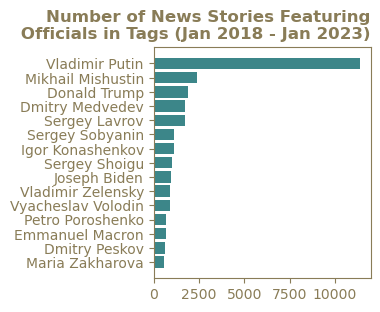

In [35]:
# Plot bar chart
names_df.sort_values(by='frequency', inplace=True)

plt.figure(figsize=(2.8, 3))
plt.barh(names_df['eng_name'], names_df['frequency'], color=color_1)
plt.title('Number of News Stories Featuring\n Officials in Tags (Jan 2018 - Jan 2023)', loc='right');

## Analysis of news coverage during presidential elections

### Useful functions

In [36]:
def election(df, dat1, dat2, candidates, tokens):
    """
    Calculates for presidential candidates the number 
    of mentions in the news and the duration of videos 
    during the campaign period
    
    Args: 
    df - dataframe with tokenized data
    dat1, dat2 - datetime, date of start and date of end
                 of the campaign
    candidates - list of candidates names
    tokens - list of candidates tokens
    
    Returns: candidates_df - dataframe
    """
    df_elect = df[(df['dat']>=dat1)&(df['dat']<=dat2)].copy()
    
    news_number = []
    news_duration = []
    
    for i in range(len(tokens)):
        # Mark news in which the candidate is mentioned
        token_dict = {'body_token_final': [tokens[i]],
                      'title_token_final': [tokens[i]]}
        df_c = find_tokens(df_elect, token_dict)
        
        # Number of news where the candidate was mentioned
        news_number_c = df_c.loc[df_c['contain_token']==1, 'url'].count()
        # Duration of news where the candidate was mentioned (minutes)
        news_duration_c = round(df_c.loc[df_c['contain_token']==1, 'video_duration_seconds'].sum() / 60)
        
        news_number.append(news_number_c)
        news_duration.append(news_duration_c)
    
    candidates_df = pd.DataFrame(candidates, columns =['candidates'])
    candidates_df['news_number'] = news_number
    candidates_df['news_duration'] = news_duration
    
    # Translate candidate names into English
    candidates_df['eng_name'] = candidates_df['candidates'].apply(lambda x: tss.google(x, 'ru', 'en'))
    
    candidates_df.sort_values(by='news_duration', inplace=True)
    
    
    return candidates_df 

### Presidential election 2018

In [37]:
# The presidential campaign
dat1 = pd.to_datetime('2018-02-17')
dat2 = pd.to_datetime('2018-03-17')

# Candidates
candidates = ['путин', 'грудинин', 'жириновский',
              'собчак', 'явлинский', 'титов',
              'сурайкин', 'бабурин']

tokens = ['путин', 'грудинин', 'жириновск',
          'собчак', 'явлинск', 'титов',
          'сурайкин', 'бабурин']

In [38]:
candidates_df_2018 = election(df_tokenized, dat1, dat2, candidates, tokens)
candidates_df_2018

,candidates,news_number,news_duration,eng_name
6,сурайкин,33,239,Suraykin
3,собчак,33,247,Sobchak
5,титов,32,247,Titov
1,грудинин,38,250,Grudinin
4,явлинский,34,252,Yavlinsky
7,бабурин,33,252,Baburin
2,жириновский,40,268,Zhirinovsky
0,путин,300,1260,Putin


### Presidential election 2012

In [39]:
# The presidential campaign
dat1 = pd.to_datetime('2012-02-05')
dat2 = pd.to_datetime('2012-03-03')

# Candidates
candidates = ['путин', 'зюганов', 'прохоров',
              'жириновский', 'миронов']

tokens = ['путин', 'зюганов', 'прохоров',
              'жириновск', 'миронов']

In [40]:
candidates_df_2012 = election(df_tokenized, dat1, dat2, candidates, tokens)
candidates_df_2012

,candidates,news_number,news_duration,eng_name
1,зюганов,78,513,Zyuganov
2,прохоров,70,528,Prokhorov
3,жириновский,87,554,Zhirinovsky
4,миронов,73,554,Mironov
0,путин,233,1162,Putin


### Visualizations

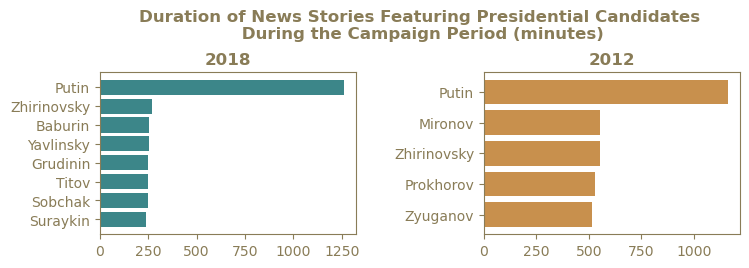

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(8,3))

ax[0].barh(candidates_df_2018['eng_name'], candidates_df_2018['news_duration'], color=color_1)
ax[1].barh(candidates_df_2012['eng_name'], candidates_df_2012['news_duration'], color=color_3)
ax[0].title.set_text('2018')
ax[1].title.set_text('2012')

# Add more space between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.23,
                    right=0.9,
                    top=0.77,
                    wspace=0.5)

plt.suptitle('Duration of News Stories Featuring Presidential Candidates\n During the Campaign Period (minutes)',
             size=12, weight='bold');